# MSDS 422 Assignment 2

## Background
Compete in the House Prices:  Advanced Regression Techniques (Links to an external site.) competition, where you will predict house prices in Ames, Iowa (‘SalePrice’).  You will be required to submit predictions to Kaggle.com and provide evidence of those submissions. As part of the analysis, you must address the following at a minimum. 

## Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  

## Requirements

#### 1. Conduct your analysis using a cross-validation design.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
#import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#no need for ID (arbitrary number)
train = train.drop(labels = 'Id',axis=1)
test = test.drop(labels = 'Id',axis=1)

In [4]:
train.shape

(1460, 80)

In [5]:
train.select_dtypes(include=object).shape

(1460, 43)

In [6]:
train.select_dtypes(include=np.number).shape
train.select_dtypes(include=np.number).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
list(train.select_dtypes(include=object).columns)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [8]:
list(train.select_dtypes(include=np.number).columns)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [9]:
#check for missing data 
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

There are 1460 records. Remove variables with over 100 missing data points.

In [10]:
#drop columns with lots of missing data
train = train.drop(labels = ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

In [11]:
#fill NA values
#train = train.dropna()
values = {
    'FireplaceQu':"None",
    'LotFrontage': 0,
    'GarageYrBlt': 1880, 
    'GarageType': "None",
    'GarageFinish': "None",
    'GarageQual': "None",
    'GarageCond': "None",
    'BsmtFinType2': "None",
    'BsmtExposure': "None",
    'BsmtFinType1': "None", 
    'BsmtCond': "None",
    'BsmtQual': "None",
    'MasVnrArea': 0,
    'MasVnrType': "None",
    'Electrical': "None"
}

train.fillna(value=values, inplace=True)
test.fillna(value=values, inplace=True)

#see if na's were filled
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [12]:
#check for dupes
train.duplicated().sum()

0

There are no duplicate rows in the dataset.

Text(0.5, 1.0, 'Boxplot of Sale Prices')

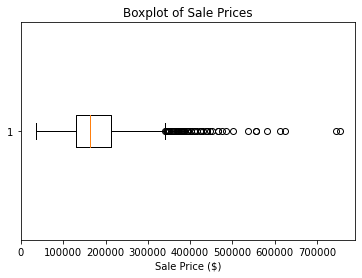

In [13]:
#check histogram of SalePrice
fig, ax = plt.subplots()
plt.boxplot(train["SalePrice"], vert=False)
plt.xlabel('Sale Price ($)')
plt.title('Boxplot of Sale Prices')

Data is skewed right, may need to remove outliers.

Text(0.5, 1.0, 'Boxplot of Sale Prices')

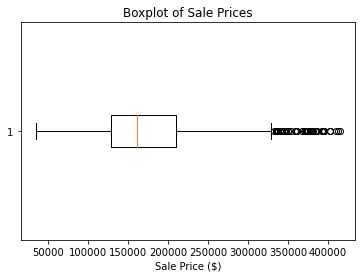

In [14]:
# remove any row that has a SalePrice value with z-score > 3
numeric_cols = train._get_numeric_data().columns 
train = train[(np.abs(stats.zscore(train['SalePrice'])) < 3)]

#check SalePrice histogram again
fig, ax = plt.subplots()
plt.boxplot(train["SalePrice"], vert=False)
plt.xlabel('Sale Price ($)')
plt.title('Boxplot of Sale Prices')

The new boxplot shows less outliers on the right, which may have been influential points and skewed the models we will create.

#### 2. Conduct EDA and provide appropriate visualizations in the process.

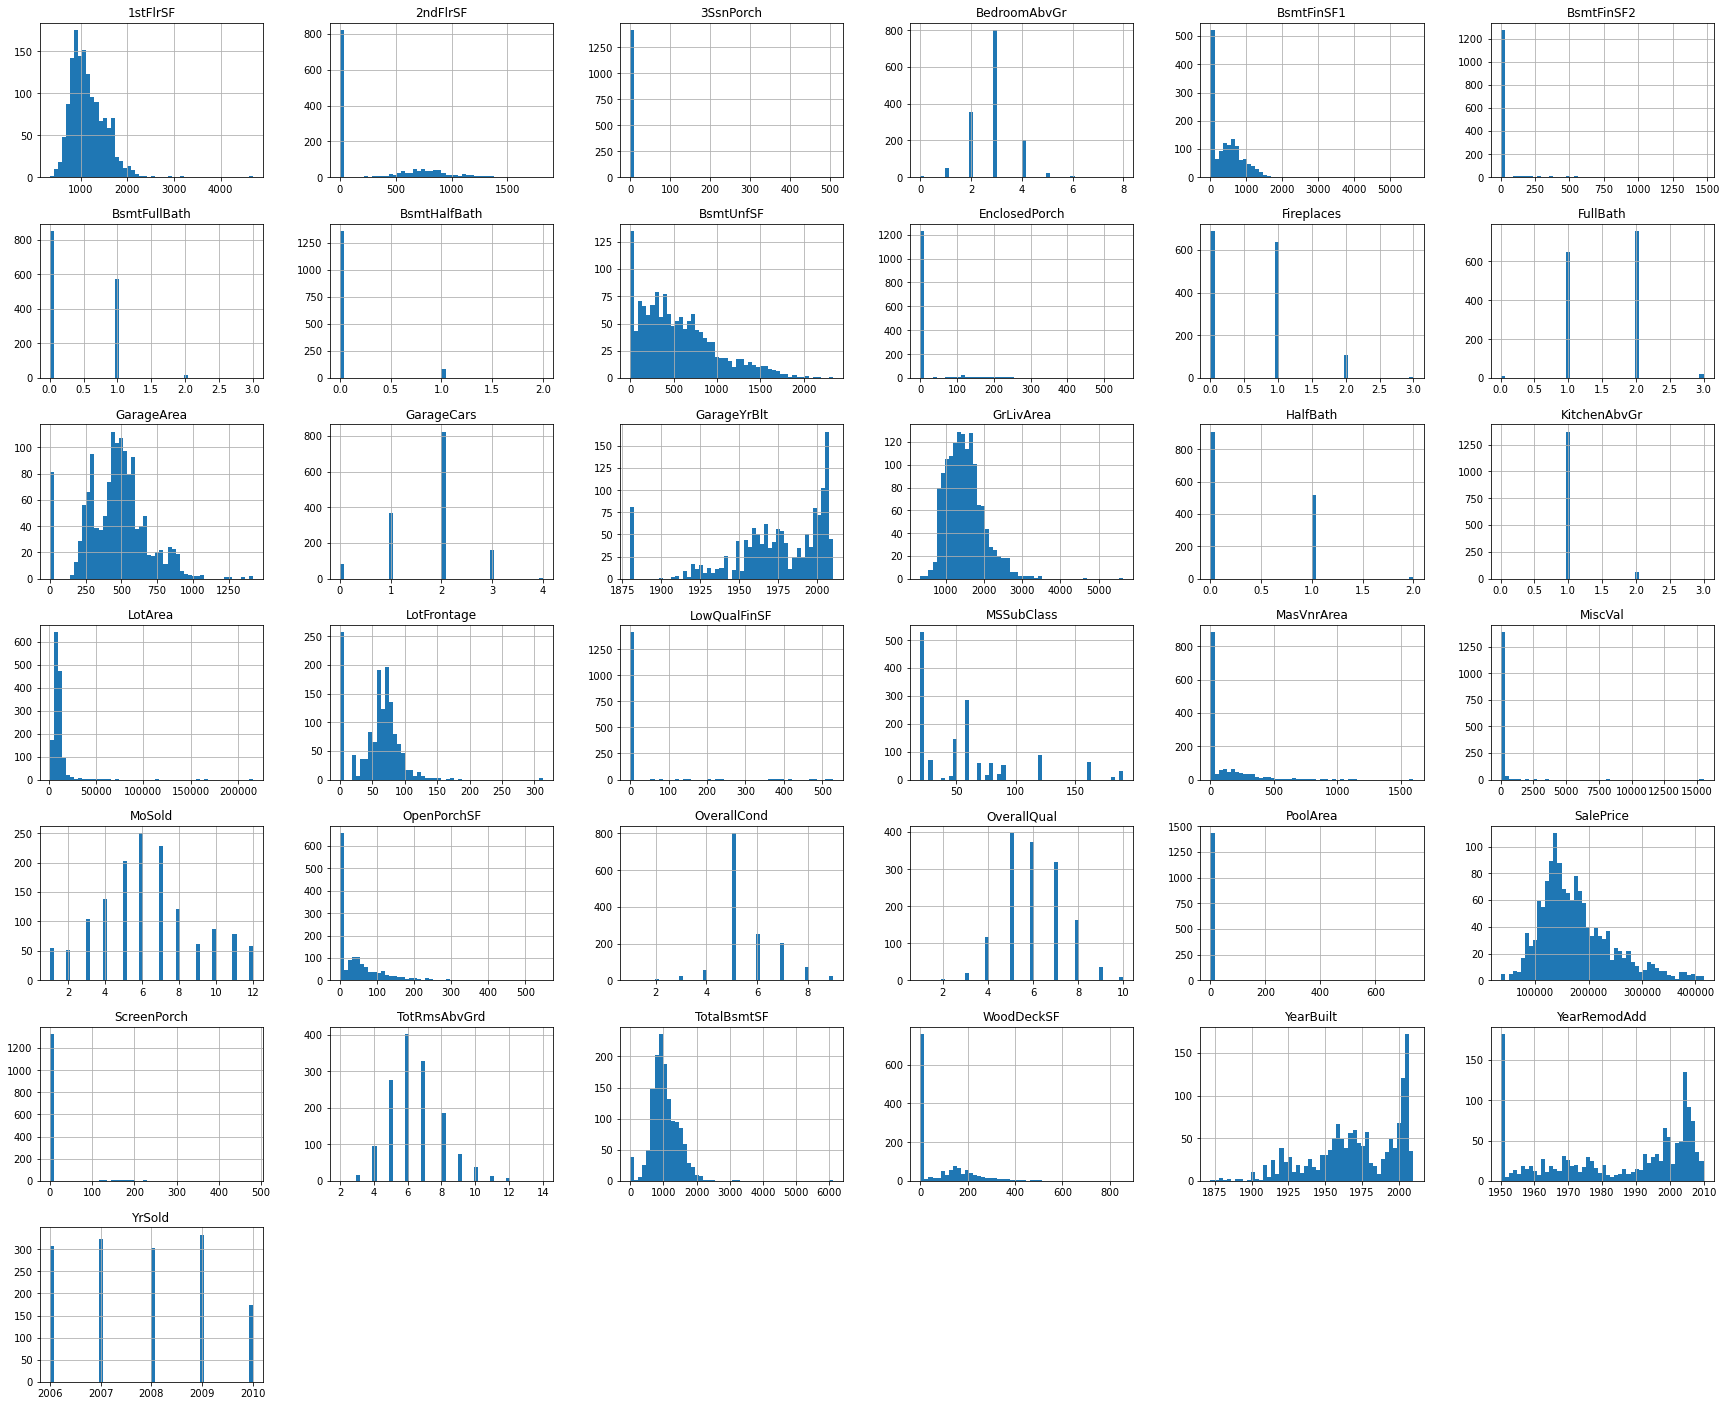

In [15]:
#distributions
train.hist(bins=50, figsize=(30,25))
plt.show()

#### 3. Build a minimum of two separate regression models using the training set.

In [16]:
X = train.loc[:, train.columns != 'SalePrice']
numeric_cols = X._get_numeric_data().columns 

X_num = X[numeric_cols]

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif_info['Column'] = X_num.columns
vif_info.sort_values('VIF', ascending=False).round(5)

/Users/kagenquiballo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Column
9,inf,BsmtFinSF2
8,inf,BsmtFinSF1
15,inf,GrLivArea
14,inf,LowQualFinSF
13,inf,2ndFlrSF
12,inf,1stFlrSF
11,inf,TotalBsmtSF
10,inf,BsmtUnfSF
35,24337.47474,YrSold
6,20712.19337,YearRemodAdd


In [17]:
#correlation matrix
X_num.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [18]:
# GarageArea x GarageCars = .83  - keep area, remove car, add area per car
#X_num_2['GarageAreaPerCar'] = X_num_2.apply(lambda x: x['GarageArea'] / x['GarageCars'],axis=1)
X_num = X_num.drop(['GarageCars'],axis=1)
# GarageYrBlt x YearBuilt = .83 - keep year built, remove garage
X_num = X_num.drop(['GarageYrBlt'],axis=1)
# TotRmsAbvGrd x GrLivArea = .82 - keep area, remove rooms, add area per room
#X_num['GrLivAreaPerRoom'] = X_num.apply(lambda x: x['GrLivArea'] / x['TotRmsAbvGrd'],axis=1)
X_num = X_num.drop(['BedroomAbvGr'],axis=1)
# TotalBsmtSF x 1stFlrSF = .88 (remove the 1st and 2)
X_num['TotalBsmtSF_and_GrLivArea_and_GarageArea_and_MasVnrArea_and_OpenPorchSF_and_WoodDeckSF'] = X_num.apply(lambda x: x['TotalBsmtSF'] + x['GrLivArea'] + x['GarageArea'] + x['MasVnrArea'] + x['OpenPorchSF'] + x['WoodDeckSF']  ,axis=1)
X_num = X_num.drop(['TotalBsmtSF', 'BsmtUnfSF', 'OpenPorchSF', 'LotFrontage', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageArea', 'MasVnrArea'],axis=1)
# YrSold, YearRemodAdd, YearBuilt
X_num['YrSold_minus_YearRemodAdd'] = X_num.apply(lambda x: x['YrSold'] - x['YearRemodAdd'],axis=1)
#X_num_2['YrSold_minus_YearBuilt'] = X_num_2.apply(lambda x: x['YrSold'] - x['YearBuilt'],axis=1)
X_num = X_num.drop(['YrSold', 'YearRemodAdd', 'YearBuilt'],axis=1)
# OverallQual + OverallCond
X_num['OverallQual_and_OverallCond_per_area'] = X_num.apply(lambda x: (x['OverallQual'] + x['OverallCond']) / x['TotalBsmtSF_and_GrLivArea_and_GarageArea_and_MasVnrArea_and_OpenPorchSF_and_WoodDeckSF'],axis=1)
X_num = X_num.drop(['OverallQual', 'OverallCond'],axis=1)
# TotBaths
#X_num_2['TotBath_and_TotRmsAbvGrd'] = X_num_2.apply(lambda x: x['BsmtFullBath'] + x['BsmtHalfBath']*.5 + x['FullBath'] + x['HalfBath']*.5 + x['TotRmsAbvGrd'],axis=1)
X_num = X_num.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'KitchenAbvGr'],axis=1)
X_num = X_num.drop(['Fireplaces'],axis=1)

#rerun VIF
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif_info['Column'] = X_num.columns
vif_info.sort_values('VIF', ascending=False).round(5)

,VIF,Column
10,7.89023,TotalBsmtSF_and_GrLivArea_and_GarageArea_and_M...
12,6.32373,OverallQual_and_OverallCond_per_area
9,6.30739,MoSold
0,2.79990,MSSubClass
11,2.45075,YrSold_minus_YearRemodAdd
1,2.36637,LotArea
3,1.89475,WoodDeckSF
4,1.21228,EnclosedPorch
6,1.12242,ScreenPorch
7,1.03837,PoolArea


In [19]:
#correlation matrix
X_num.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,MSSubClass,LotArea,LowQualFinSF,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,TotalBsmtSF_and_GrLivArea_and_GarageArea_and_MasVnrArea_and_OpenPorchSF_and_WoodDeckSF,YrSold_minus_YearRemodAdd,OverallQual_and_OverallCond_per_area
MSSubClass,1.00,-0.14,0.04,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.02,-0.07,-0.05,0.06
LotArea,-0.14,1.00,-0.00,0.16,-0.02,0.02,0.03,0.08,0.04,0.00,0.29,-0.01,-0.22
LowQualFinSF,0.04,-0.00,1.00,-0.02,0.07,-0.00,-0.03,0.07,-0.00,-0.02,0.01,0.07,-0.03
WoodDeckSF,-0.01,0.16,-0.02,1.00,-0.13,-0.03,-0.08,0.07,-0.01,0.02,0.38,-0.20,-0.30
EnclosedPorch,-0.01,-0.02,0.07,-0.13,1.00,-0.04,-0.08,0.06,0.02,-0.03,-0.10,0.19,0.09
3SsnPorch,-0.04,0.02,-0.00,-0.03,-0.04,1.00,-0.03,-0.01,0.00,0.03,0.04,-0.05,-0.03
ScreenPorch,-0.03,0.03,-0.03,-0.08,-0.08,-0.03,1.00,0.06,0.03,0.03,0.08,0.05,-0.08
PoolArea,0.01,0.08,0.07,0.07,0.06,-0.01,0.06,1.00,0.03,-0.04,0.14,-0.01,-0.05
MiscVal,-0.01,0.04,-0.00,-0.01,0.02,0.00,0.03,0.03,1.00,-0.01,-0.02,0.01,0.05
MoSold,-0.02,0.00,-0.02,0.02,-0.03,0.03,0.03,-0.04,-0.01,1.00,0.06,-0.03,-0.04


In [20]:
#apply to train
train['TotalBsmtSF_and_GrLivArea_and_GarageArea_and_MasVnrArea_and_OpenPorchSF_and_WoodDeckSF'] = train.apply(lambda x: x['TotalBsmtSF'] + x['GrLivArea'] + x['GarageArea'] + x['MasVnrArea'] + x['OpenPorchSF'] + x['WoodDeckSF']  ,axis=1)
train['YrSold_minus_YearRemodAdd'] = train.apply(lambda x: x['YrSold'] - x['YearRemodAdd'],axis=1)
train['OverallQual_and_OverallCond_per_area'] = train.apply(lambda x: (x['OverallQual'] + x['OverallCond']) / x['TotalBsmtSF_and_GrLivArea_and_GarageArea_and_MasVnrArea_and_OpenPorchSF_and_WoodDeckSF'],axis=1)

train = train.drop(['GarageCars', 'GarageYrBlt', 'BedroomAbvGr', 'TotalBsmtSF', 'BsmtUnfSF', 'OpenPorchSF', 'LotFrontage', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageArea', 'MasVnrArea', 'YrSold', 'YearRemodAdd', 'YearBuilt', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'KitchenAbvGr', 'Fireplaces'],axis=1)

In [43]:
#choose important numeric
numeric_cols = train._get_numeric_data().columns 
X_numeric_df = train[numeric_cols]

corr_matrix = train.corr()
train.corr()['SalePrice'].sort_values(ascending=False)
#list(corr_matrix['SalePrice'][(corr_matrix["SalePrice"] > 0.5) | (corr_matrix["SalePrice"] < -0.5)].index)

SalePrice                                                                                 1.000000
TotalBsmtSF_and_GrLivArea_and_GarageArea_and_MasVnrArea_and_OpenPorchSF_and_WoodDeckSF    0.800501
WoodDeckSF                                                                                0.330921
LotArea                                                                                   0.253476
ScreenPorch                                                                               0.092677
MoSold                                                                                    0.081094
3SsnPorch                                                                                 0.061720
PoolArea                                                                                  0.036829
MiscVal                                                                                  -0.018489
LowQualFinSF                                                                             -0.060149
MSSubClass

In [ ]:
#choose important categorical
cat_cols = list(train.select_dtypes(include=object).columns)
X_categorical_df = pd.get_dummies(train[cat_cols], columns=cat_cols)

In [ ]:
#combine all data back together
X_final = X_numeric_df.join(X_categorical_df)

In [33]:
#standard scaling
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
std_scaler = StandardScaler()
numeric_cols = X_final._get_numeric_data().columns 
X_final[numeric_cols] = std_scaler.fit_transform(X_final[numeric_cols])

#split 
y = X_final.SalePrice
X_final = X_final.drop(columns=["SalePrice"], axis=1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn import cross_validation as CV
#from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
#from sklearn.preprocessing import PolynomialFeatures

#validation sets from training set
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=1)
error = [] #perf
model = [] #method

# lin_reg
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
#rmsle = CV.cross_val_score(lin_reg, X_val, , cv=10, scoring='neg_mean_squared_error')
#np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
#method.append('Linear Regression')
#perf.append(rmsle)

#### 4. Evaluate polynomial, indicator, dichotomous, & piecewise model components.

#### 5. Create at least one feature from the data set.

#### 6. Evaluate the models’ assumptions.

#### 7. Evaluate goodness of fit metrics on the training and validation sets.

#### 8. Submit predictions for the unseen test set available on Kaggle.com.

#### 9. Provide your Kaggle user name and a screen snapshot of your Kaggle scores.

#### 10. Discuss what your models tell you in layman’s terms